## Implementation on Images

In [10]:
from ultralytics import YOLO
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

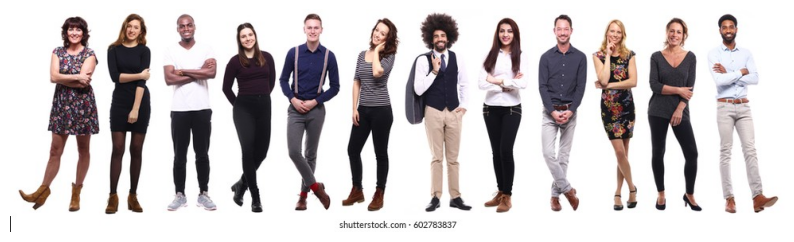

In [15]:
img = f"images/1.jpg"

image = cv.imread(img)

plt.figure(figsize=[10,5])
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [16]:
model = YOLO("../YOLO-Weights/yolov8n.pt")

results = model.predict(image)
result = results[0]
len(result.boxes)


0: 192x640 12 persons, 202.5ms
Speed: 8.0ms preprocess, 202.5ms inference, 5.0ms postprocess per image at shape (1, 3, 192, 640)


12

In [17]:
box = result.boxes[0]
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([0.])
Coordinates: tensor([[266.6882,  16.7974, 333.7771, 257.4776]])
Probability: tensor([0.8889])


In [18]:
print("Object type:",box.cls[0])
print("Coordinates:",box.xyxy[0])
print("Probability:",box.conf[0])

Object type: tensor(0.)
Coordinates: tensor([266.6882,  16.7974, 333.7771, 257.4776])
Probability: tensor(0.8889)


In [19]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 0.0
Coordinates: [266.68817138671875, 16.797449111938477, 333.777099609375, 257.47760009765625]
Probability: 0.8889205455780029


In [22]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: person
Coordinates: [267, 17, 334, 257]
Probability: 0.89


In [23]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: person
Coordinates: [267, 17, 334, 257]
Probability: 0.89
---
Object type: person
Coordinates: [876, 6, 964, 260]
Probability: 0.89
---
Object type: person
Coordinates: [731, 11, 794, 253]
Probability: 0.89
---
Object type: person
Coordinates: [10, 9, 113, 257]
Probability: 0.88
---
Object type: person
Coordinates: [339, 5, 414, 253]
Probability: 0.87
---
Object type: person
Coordinates: [663, 6, 727, 253]
Probability: 0.87
---
Object type: person
Coordinates: [800, 11, 871, 256]
Probability: 0.86
---
Object type: person
Coordinates: [591, 11, 649, 251]
Probability: 0.83
---
Object type: person
Coordinates: [120, 6, 179, 259]
Probability: 0.83
---
Object type: person
Coordinates: [503, 5, 579, 256]
Probability: 0.83
---
Object type: person
Coordinates: [190, 5, 262, 256]
Probability: 0.82
---
Object type: person
Coordinates: [418, 12, 489, 251]
Probability: 0.81
---


Object type: person
Coordinates: [267, 17, 334, 257]
Probability: 0.89
---
Object type: person
Coordinates: [876, 6, 964, 260]
Probability: 0.89
---
Object type: person
Coordinates: [731, 11, 794, 253]
Probability: 0.89
---
Object type: person
Coordinates: [10, 9, 113, 257]
Probability: 0.88
---
Object type: person
Coordinates: [339, 5, 414, 253]
Probability: 0.87
---
Object type: person
Coordinates: [663, 6, 727, 253]
Probability: 0.87
---
Object type: person
Coordinates: [800, 11, 871, 256]
Probability: 0.86
---
Object type: person
Coordinates: [591, 11, 649, 251]
Probability: 0.83
---
Object type: person
Coordinates: [120, 6, 179, 259]
Probability: 0.83
---
Object type: person
Coordinates: [503, 5, 579, 256]
Probability: 0.83
---
Object type: person
Coordinates: [190, 5, 262, 256]
Probability: 0.82
---
Object type: person
Coordinates: [418, 12, 489, 251]
Probability: 0.81
---


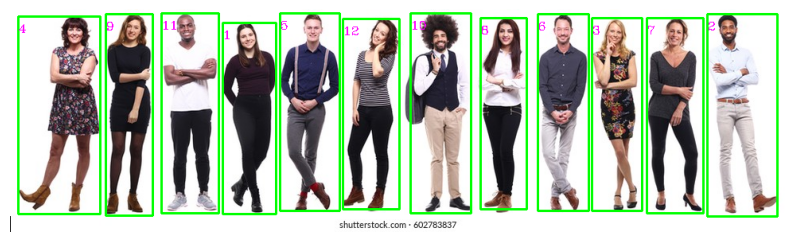

In [32]:
image = cv.imread(img)
i = 1
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

  cv.rectangle(image, (cords[0], cords[1]), (cords[2], cords[3]), (0,255,0),2)
  cv.putText(image, f"{i}", (cords[0], cords[1]+20), cv.FONT_HERSHEY_COMPLEX, 0.5, (255,0,255), 1)
  i +=1

plt.figure(figsize=[10,5])
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()